In [30]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc, asc

import matplotlib.pyplot as plt
import pandas as pd

import datetime as dt

In [2]:
db = "hawaii.sqlite"

engine = create_engine(f"sqlite:///{db}", echo=False)
conn = engine.connect()

ins = inspect(conn)
ins.get_table_names()

['measurement', 'station']

In [3]:
columns_meas = ins.get_columns('measurement')
for c in columns_meas:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [4]:
columns_meas = ins.get_columns('station')
for c in columns_meas:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
Base = automap_base()
Base.prepare(conn, reflect = True)

Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(conn)

In [6]:
## Choose start date and end date for your trip
print("Select the start date of your vacation")
start_year = int(input("Year: "))
start_month = int(input("Month number: "))
start_day = int(input("Day: "))

end_days = int(input("How many days do you want to go (3-15): "))

print("")
start_date = dt.date(start_year, start_month, start_day)
end_date = start_date + dt.timedelta(days=end_days)
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Select the start date of your vacation
Year: 2016
Month number: 12
Day: 24
How many days do you want to go (3-15): 7

Start date: 2016-12-24
End date: 2016-12-31


In [7]:
# last twelve months of rain
rain_date = start_date - dt.timedelta(weeks=12*4)
print(rain_date)

2016-01-23


In [8]:
# date and prcp
q = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(rain_date, start_date)).all()
q

[('2016-01-23', 0.0),
 ('2016-01-24', 0.0),
 ('2016-01-25', 0.04),
 ('2016-01-26', 0.16),
 ('2016-01-27', 0.01),
 ('2016-01-28', 0.0),
 ('2016-01-29', 0.0),
 ('2016-01-30', 0.0),
 ('2016-01-31', 0.0),
 ('2016-02-01', 0.0),
 ('2016-02-02', 0.06),
 ('2016-02-03', 0.0),
 ('2016-02-04', 0.0),
 ('2016-02-05', 0.0),
 ('2016-02-06', 0.0),
 ('2016-02-07', 0.02),
 ('2016-02-08', 0.01),
 ('2016-02-09', 0.0),
 ('2016-02-10', 0.0),
 ('2016-02-11', 0.0),
 ('2016-02-12', 0.02),
 ('2016-02-13', 0.0),
 ('2016-02-14', 0.0),
 ('2016-02-15', 0.0),
 ('2016-02-16', 0.02),
 ('2016-02-17', 0.21),
 ('2016-02-18', 0.02),
 ('2016-02-19', 0.03),
 ('2016-02-20', 0.01),
 ('2016-02-21', 0.0),
 ('2016-02-22', 0.0),
 ('2016-02-23', 0.0),
 ('2016-02-24', 0.0),
 ('2016-02-25', 0.0),
 ('2016-02-26', 0.0),
 ('2016-02-27', 0.0),
 ('2016-02-28', 0.0),
 ('2016-02-29', 0.0),
 ('2016-03-01', 0.0),
 ('2016-03-02', 0.0),
 ('2016-03-03', 0.0),
 ('2016-03-04', 0.0),
 ('2016-03-05', 0.0),
 ('2016-03-06', 0.0),
 ('2016-03-07', 0.0)

In [9]:
rain_df = pd.DataFrame(q)
rain_df = rain_df.set_index('date')
rain_df.head()

,prcp
date,
2016-01-23,0.00
2016-01-24,0.00
2016-01-25,0.04
2016-01-26,0.16
2016-01-27,0.01


In [10]:
rain_df = rain_df.sort_values(by='date')
rain_df.head()

,prcp
date,
2016-01-23,0.0
2016-01-23,0.0
2016-01-23,0.0
2016-01-23,0.0
2016-01-23,0.0


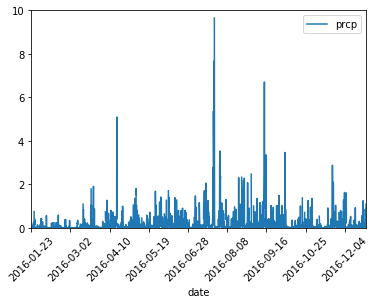

In [11]:
rain_df.plot()
plt.xticks(rotation = 45)
plt.ylim(0,10)
# ax = plt.axes()
# x_axis = ax.axes.get_xaxis()
# x_axis.set_visible(False)
plt.show()

In [12]:
rain_df.describe()

,prcp
count,1905.000000
mean,0.185727
std,0.520060
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,9.640000


In [13]:
conn.execute("select * from station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
# Design a query to calculate the total number of stations.
q2 = session.query(func.count(Station.station)).all()
q2

[(9)]

In [15]:
q3 = session.query(func.distinct(Measurement.station)).all()
q3

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [16]:
# Design a query to find the most active stations.
q4 = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
q4

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
q5 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date.between(rain_date, start_date)).all()
q5

[('2016-01-23', 75.0),
 ('2016-01-24', 78.0),
 ('2016-01-25', 69.0),
 ('2016-01-26', 65.0),
 ('2016-01-27', 69.0),
 ('2016-01-28', 64.0),
 ('2016-01-29', 68.0),
 ('2016-01-30', 73.0),
 ('2016-01-31', 74.0),
 ('2016-02-01', 69.0),
 ('2016-02-02', 68.0),
 ('2016-02-03', 69.0),
 ('2016-02-04', 65.0),
 ('2016-02-05', 67.0),
 ('2016-02-06', 69.0),
 ('2016-02-07', 70.0),
 ('2016-02-08', 56.0),
 ('2016-02-09', 57.0),
 ('2016-02-10', 58.0),
 ('2016-02-11', 61.0),
 ('2016-02-12', 71.0),
 ('2016-02-13', 74.0),
 ('2016-02-14', 71.0),
 ('2016-02-15', 75.0),
 ('2016-02-16', 72.0),
 ('2016-02-17', 71.0),
 ('2016-02-18', 72.0),
 ('2016-02-19', 69.0),
 ('2016-02-20', 71.0),
 ('2016-02-21', 72.0),
 ('2016-02-22', 60.0),
 ('2016-02-23', 69.0),
 ('2016-02-24', 67.0),
 ('2016-02-25', 64.0),
 ('2016-02-26', 69.0),
 ('2016-02-27', 69.0),
 ('2016-02-28', 71.0),
 ('2016-02-29', 69.0),
 ('2016-03-01', 72.0),
 ('2016-03-02', 63.0),
 ('2016-03-03', 63.0),
 ('2016-03-04', 62.0),
 ('2016-03-05', 70.0),
 ('2016-03-

In [18]:
tobs_df = pd.DataFrame(q5)
tobs_df = tobs_df.set_index('date')
tobs_df.head()

,tobs
date,
2016-01-23,75.0
2016-01-24,78.0
2016-01-25,69.0
2016-01-26,65.0
2016-01-27,69.0


Text(0, 0.5, 'Frequency')

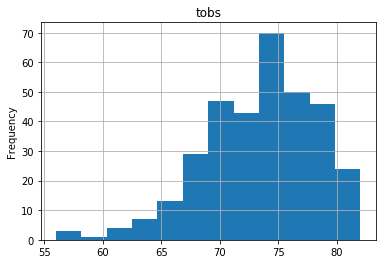

In [20]:
tobs_df.hist(bins=12)
plt.ylabel('Frequency')
plt.legend()

In [35]:
# asdf = session.query(Measurement.date, Measurement.prcp).order_by(desc(Measurement.date)).first()
# asdf[0]

'2017-08-23'